<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Step-1:-Load-the-Data/Filtering-for-Chosen-Zipcodes" data-toc-modified-id="Step-1:-Load-the-Data/Filtering-for-Chosen-Zipcodes-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Step 1: Load the Data/Filtering for Chosen Zipcodes</a></span></li><li><span><a href="#Step-2:-Data-Preprocessing" data-toc-modified-id="Step-2:-Data-Preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Step 2: Data Preprocessing</a></span></li><li><span><a href="#Step-3:-EDA-and-Visualization" data-toc-modified-id="Step-3:-EDA-and-Visualization-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Step 3: EDA and Visualization</a></span></li><li><span><a href="#Step-4:-Reshape-from-Wide-to-Long-Format" data-toc-modified-id="Step-4:-Reshape-from-Wide-to-Long-Format-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Step 4: Reshape from Wide to Long Format</a></span></li><li><span><a href="#Step-5:-SARIMAX-Modeling" data-toc-modified-id="Step-5:-SARIMAX-Modeling-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Step 5: SARIMAX Modeling</a></span><ul class="toc-item"><li><span><a href="#Select-Best-Parameters" data-toc-modified-id="Select-Best-Parameters-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Select Best Parameters</a></span></li><li><span><a href="#Calculate-RMSE-for-West-Hollywood" data-toc-modified-id="Calculate-RMSE-for-West-Hollywood-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Calculate RMSE for West Hollywood</a></span></li></ul></li><li><span><a href="#Calculate-5-&amp;-10-Year-ROI" data-toc-modified-id="Calculate-5-&amp;-10-Year-ROI-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Calculate 5 &amp; 10 Year ROI</a></span></li><li><span><a href="#Step-6:-Interpreting-Results" data-toc-modified-id="Step-6:-Interpreting-Results-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Step 6: Interpreting Results</a></span></li></ul></div>

# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import matplotlib
%matplotlib inline

import itertools
import statsmodels.api as sm

In [3]:
data = pd.read_csv('up_to_date_zillow_data.csv')
df = pd.DataFrame(data)

In [4]:
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,NaN,...,1416272.0,1409421.0,1407017.0,1412042.0,1414135.0,1415095.0,1408966.0,1401018.0,1389676.0,1384859.0
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,358776.0,...,957541.0,956310.0,954994.0,954985.0,956480.0,958337.0,959091.0,958959.0,958378.0,959519.0
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,NaN,...,1669612.0,1663472.0,1659302.0,1662263.0,1662774.0,1658055.0,1649411.0,1641047.0,1639442.0,1635311.0
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,200271.0,...,335925.0,335929.0,336035.0,335760.0,335937.0,336360.0,337373.0,338225.0,338713.0,338889.0
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,540023.0,...,1187731.0,1185049.0,1183037.0,1182915.0,1185225.0,1187244.0,1188570.0,1188375.0,1189551.0,1192253.0


In [5]:
df_LA = df[df['City'] == 'Los Angeles']

# df_Austin = df[df['City'] == 'Austin']
# df_Austin = df_Austin[df_Austin['State'] == 'TX']

In [6]:
df_LA.sort_values(by='SizeRank', na_position='first')
#df_Austin.sort_values(by='SizeRank', na_position='first')

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31
43,96027,44,90046,Zip,CA,CA,Los Angeles,Los Angeles-Long Beach-Anaheim,Los Angeles County,177088.0,...,1843470.0,1853651.0,1868109.0,1880135.0,1900896.0,1918719.0,1936573.0,1948696.0,1963133.0,1982231.0
98,96015,99,90034,Zip,CA,CA,Los Angeles,Los Angeles-Long Beach-Anaheim,Los Angeles County,251418.0,...,1398417.0,1404092.0,1415063.0,1427241.0,1445321.0,1463208.0,1478076.0,1485024.0,1492268.0,1515853.0
114,96025,115,90044,Zip,CA,CA,Los Angeles,Los Angeles-Long Beach-Anaheim,Los Angeles County,126593.0,...,458596.0,461738.0,466106.0,470368.0,476367.0,482154.0,488178.0,492045.0,496175.0,502824.0
135,96007,136,90026,Zip,CA,CA,Los Angeles,Los Angeles-Long Beach-Anaheim,Los Angeles County,107147.0,...,985578.0,993267.0,1004494.0,1015062.0,1028334.0,1040727.0,1050599.0,1054837.0,1053531.0,1054874.0
172,96047,174,90066,Zip,CA,CA,Los Angeles,Los Angeles-Long Beach-Anaheim,Los Angeles County,237560.0,...,1489995.0,1493731.0,1501840.0,1513381.0,1534242.0,1552524.0,1569932.0,1579845.0,1593031.0,1624438.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10153,96058,10281,90077,Zip,CA,CA,Los Angeles,Los Angeles-Long Beach-Anaheim,Los Angeles County,507450.0,...,2941293.0,2957902.0,2976860.0,3001129.0,3030649.0,3058392.0,3069540.0,3067907.0,3060731.0,3062974.0
12492,95991,12671,90010,Zip,CA,CA,Los Angeles,Los Angeles-Long Beach-Anaheim,Los Angeles County,NaN,...,1704146.0,1676212.0,1642105.0,1618040.0,1615213.0,1626945.0,1633853.0,1633478.0,1636941.0,1656265.0
13698,96048,13909,90067,Zip,CA,CA,Los Angeles,Los Angeles-Long Beach-Anaheim,Los Angeles County,NaN,...,1384083.0,1382819.0,1385560.0,1387563.0,1390312.0,1393273.0,1399690.0,1403247.0,1404416.0,1414845.0
15910,96002,16223,90021,Zip,CA,CA,Los Angeles,Los Angeles-Long Beach-Anaheim,Los Angeles County,NaN,...,582944.0,587906.0,593058.0,598249.0,606264.0,612587.0,617230.0,619416.0,621052.0,628473.0


The top two in size rank are the West Hollywood and Palms neighborhoods. This makes sense as these are known to be very affluent neighborhoods in the Greater Los Angeles area. A less than 4,000 square foot penthouse apartment at the Edition on Sunset Blvd. in West Hollywood was listed on Zillow at $18.9M in 2020. 

The third ranked zipcode is in a pretty poor neighborhood. This makes me wonder if it is mostly multifamily units being sold here, which would increase the median home sale price for this zipcode. 

Next on the list is the zipcode containing Silverlake and Echo Park, which are popular hipster neighborhoods where some celebritites live and home to some very beautiful and nice homes. 

# Step 2: Data Preprocessing

I just checked and it looks like 'RegionName' is the zipcode and 'RegionID' is extra information that we don't need. So I will go ahead and drop that column.

In [7]:
df_LA = df_LA.drop(['RegionID','RegionType','SizeRank','StateName'], axis=1)
#df_Austin = df_Austin.drop(['RegionID','RegionType','SizeRank','StateName'], axis=1)

In [8]:
df_LA
#df_Austin

,RegionName,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,...,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31
43,90046,CA,Los Angeles,Los Angeles-Long Beach-Anaheim,Los Angeles County,177088.0,177788.0,177914.0,178037.0,178157.0,...,1843470.0,1853651.0,1868109.0,1880135.0,1900896.0,1918719.0,1936573.0,1948696.0,1963133.0,1982231.0
98,90034,CA,Los Angeles,Los Angeles-Long Beach-Anaheim,Los Angeles County,251418.0,251855.0,251607.0,252109.0,252244.0,...,1398417.0,1404092.0,1415063.0,1427241.0,1445321.0,1463208.0,1478076.0,1485024.0,1492268.0,1515853.0
114,90044,CA,Los Angeles,Los Angeles-Long Beach-Anaheim,Los Angeles County,126593.0,126421.0,126441.0,126660.0,127097.0,...,458596.0,461738.0,466106.0,470368.0,476367.0,482154.0,488178.0,492045.0,496175.0,502824.0
135,90026,CA,Los Angeles,Los Angeles-Long Beach-Anaheim,Los Angeles County,107147.0,107706.0,108223.0,109044.0,109602.0,...,985578.0,993267.0,1004494.0,1015062.0,1028334.0,1040727.0,1050599.0,1054837.0,1053531.0,1054874.0
172,90066,CA,Los Angeles,Los Angeles-Long Beach-Anaheim,Los Angeles County,237560.0,238965.0,239626.0,241114.0,241992.0,...,1489995.0,1493731.0,1501840.0,1513381.0,1534242.0,1552524.0,1569932.0,1579845.0,1593031.0,1624438.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10153,90077,CA,Los Angeles,Los Angeles-Long Beach-Anaheim,Los Angeles County,507450.0,507983.0,508703.0,510189.0,511512.0,...,2941293.0,2957902.0,2976860.0,3001129.0,3030649.0,3058392.0,3069540.0,3067907.0,3060731.0,3062974.0
12492,90010,CA,Los Angeles,Los Angeles-Long Beach-Anaheim,Los Angeles County,NaN,NaN,NaN,NaN,NaN,...,1704146.0,1676212.0,1642105.0,1618040.0,1615213.0,1626945.0,1633853.0,1633478.0,1636941.0,1656265.0
13698,90067,CA,Los Angeles,Los Angeles-Long Beach-Anaheim,Los Angeles County,NaN,NaN,NaN,NaN,NaN,...,1384083.0,1382819.0,1385560.0,1387563.0,1390312.0,1393273.0,1399690.0,1403247.0,1404416.0,1414845.0
15910,90021,CA,Los Angeles,Los Angeles-Long Beach-Anaheim,Los Angeles County,NaN,213521.0,218175.0,222174.0,228082.0,...,582944.0,587906.0,593058.0,598249.0,606264.0,612587.0,617230.0,619416.0,621052.0,628473.0


In [9]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[7:], format='%Y-%m')

In [10]:
get_datetimes(df_LA)
#get_datetimes(df_Austin)

DatetimeIndex(['1996-03-31', '1996-04-30', '1996-05-31', '1996-06-30',
               '1996-07-31', '1996-08-31', '1996-09-30', '1996-10-31',
               '1996-11-30', '1996-12-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=293, freq=None)

# Step 3: EDA and Visualization

In [11]:
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 22}

# matplotlib.rc('font', **font)

# # NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

# Step 4: Reshape from Wide to Long Format

In [12]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted#.groupby('time').aggregate({'value':'mean'})

In [13]:
df_LA_melt = melt_data(df_LA)
# df_Austin_melt = melt_data(df_Austin)

In [14]:
df_LA_melt_sort = df_LA_melt.sort_values(by=['RegionName','time','value'])
# df_Austin_melt_sort = df_Austin_melt.sort_values(by=['RegionName','time','value'])

In [15]:
df_LA_melt_sort['RegionName'].nunique()
# df_Austin_melt_sort['RegionName'].nunique()

100

We can see there are 100 different zipcodes in our dataset for Los Angeles. 

In [16]:
len(df_LA_melt_sort)
# len(df_Austin_melt_sort)

28727

And for those 100 zipcodes we have 28,727 datapoints. That's a good amount, giving an average of about 287 data points per zip code. Some may have more than others. We can explore that more when we come to it. 

In [17]:
df_LA_melt_sort.asfreq('m').index
# df_Austin_melt_sort

DatetimeIndex([], dtype='datetime64[ns]', freq='M')

In [18]:
zipcodes = df_LA_melt_sort['RegionName'].unique()
# zipcodes = df_Austin_melt_sort['RegionName'].unique()

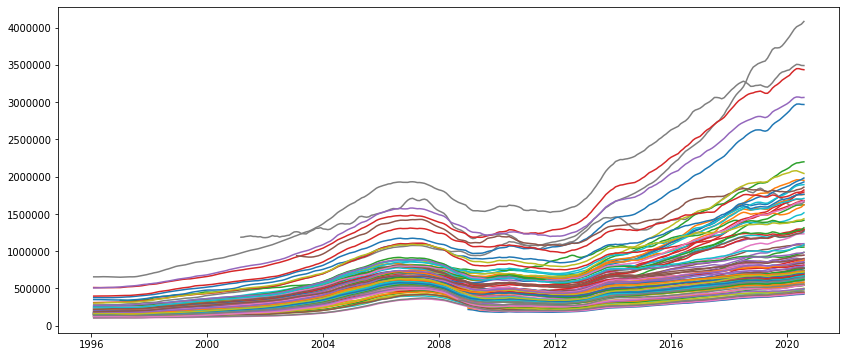

In [19]:
plt.figure(figsize=(14,6))
labels = []
for zipcode in zipcodes:
    df_zip = df_LA_melt_sort[df_LA_melt_sort['RegionName'] == zipcode]
    plt.plot(df_zip['time'],df_zip['value'], label=zipcode)
    labels.append(zipcode)

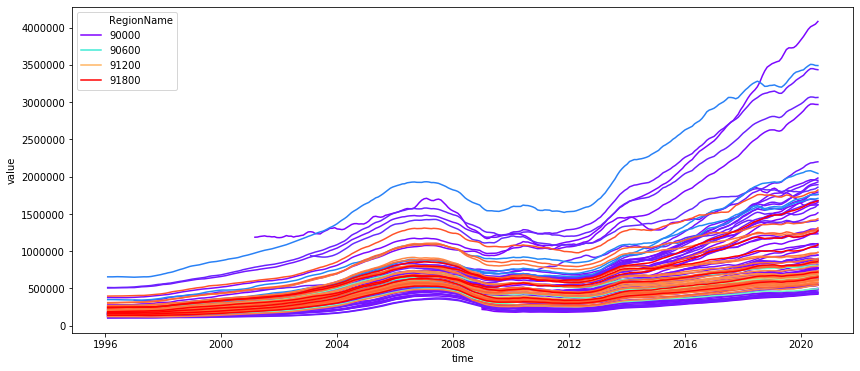

In [20]:
import seaborn as sns
plt.figure(figsize=(14,6))
sns.lineplot(x='time', y='value', data=df_LA_melt_sort, hue='RegionName', palette="rainbow");

**Zipcodes**

We can see a similar trend amongst all of our zipcodes. A few seem to be much higher than others, representing the more affluent neighborhoods. 

This data set represents median housing sale prices, so they could also include multifamily housing units as well, which would sell for a higher price than nearby single family homes. I imagine though overall the median would be representative and not skewed by this as density tends to be mixed (single family homes and multifamily homes), and sometimes in multifamily homes the individual apartments or condos are listed for sale individually. 

**Housing Bubble**

We can see the housing bubble of 2008 in the data here. Home sale values start increasing rapidly in 2004, then max out late 2006/early 2007 and begin to dip to a min in around 2009. Some zipcodes slowly drop even lower for the next couple of years. Prices slowly begin to recover, reaching max bubble values in about 2013, 6 years after the bubble burst. 

Since the market is volatile and bubbles are somewhat unpredictable and do occur, with another one being anticipated in 2020-2022, I am going to leave this data in the data set. 

# Step 5: SARIMAX Modeling

I conducted research and found that there is seasonality in home sales, so I am going to use SARIMA for my ARIMA Modeling, which integrates seasonality in the model. 

**Seasonality**

According to the National Association of Realtors, the number of home sales increases significantly in the spring, with home sales increasing by 34% in February and March. 

Sales continue upward with the busiest home selling months being May through August, accounting for 40% of United States annual home sales volume. 

The slowest months are November through February, with January being the slowest. 

Prices of homes slightly increase during surge months when the demand in the market is higher. Therefore selling homes during these peak times could prove to be advantageous for maximizing profits.

Reference: https://www.nar.realtor/blogs/economists-outlook/seasonality-in-the-housing-market

**Volatility**

A note about market volatility. Since the strategy we are focused on here is buy and hold, if and when there is a housing bubble, it is best to continue to hold during this time. While having a mortgage does create a liability, history shows that during a recession or related housing bubble, the rental market is not as affected as the housing market. 

Reference: https://www.forbes.com/sites/forbesrealestatecouncil/2020/01/02/how-will-a-recession-affect-my-rental-properties/#a4b70b45c70f

In [21]:
WeHo = df_LA_melt_sort[df_LA_melt_sort['RegionName'] == 90046]

In [22]:
WeHo.index = WeHo['time']

In [23]:
to_drop = ['RegionName','City','State','Metro','CountyName','time']
WeHo = WeHo.drop(to_drop, axis=1)
WeHo 

,value
time,
1996-01-31,177088.0
1996-02-29,177788.0
1996-03-31,177914.0
1996-04-30,178037.0
1996-05-31,178157.0
...,...
2020-03-31,1918719.0
2020-04-30,1936573.0
2020-05-31,1948696.0


## Select Best Parameters 

Select best parameters for p, d & q according to the lowest BIC value.

In [24]:
# Define the p, d and q parameters to take any value between 0 and 3
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [25]:
# # Run a grid with pdq and seasonal pdq parameters calculated above and get the best BIC value
# ans = []
# for comb in pdq:
#     for combs in pdqs:
#         try:
#             mod = sm.tsa.statespace.SARIMAX(WeHo,
#                                             order=comb,
#                                             seasonal_order=combs,
#                                             enforce_stationarity=False,
#                                             enforce_invertibility=False,
#                                             freq='M')

#             output = mod.fit(maxiter=100) 
#             ans.append([comb, combs, output.bic])
#             print('SARIMAX {} x {}12 : BIC Calculated ={}'.format(comb, combs, output.bic))
#         except:
#             continue

In [26]:
# Find the parameters with minimal BIC value
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'bic'])
ans_df.loc[ans_df['bic'].idxmin()]

NameError: name 'ans' is not defined

**From maxiter = 100**

In [ ]:
# Plug the optimal parameter values into a new SARIMAX model
SARIMAX_WeHo = sm.tsa.statespace.SARIMAX(WeHo, 
                                        order=(1, 2, 1), 
                                        seasonal_order=(2, 2, 1, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False,
                                        freq='M')

# Fit the model and print results
output = SARIMAX_WeHo.fit()

print(output.summary())

In [ ]:
output.plot_diagnostics(figsize=(16,10));

In [ ]:
# Plug the optimal parameter values into a new SARIMAX model
SARIMAX_WeHo = sm.tsa.statespace.SARIMAX(WeHo, 
                                        order=(0, 2, 1), 
                                        seasonal_order=(1, 1, 2, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False,
                                        freq='M')

# Fit the model and print results
output = SARIMAX_WeHo.fit()

print(output.summary())

In [ ]:
output.plot_diagnostics(figsize=(16,10));

In [ ]:
# Get predictions starting from 01-01-1998 and calculate confidence intervals
pred = output.get_prediction(start=pd.to_datetime('2018-12-31'), dynamic=False)
pred_conf = pred.conf_int()

In [ ]:
# Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 15, 8

# Plot observed values
ax = WeHo['2018-12':].plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Median Home Sale Prices (USD)')
plt.legend()

plt.show()

## Calculate RMSE for West Hollywood

In [ ]:
from sklearn.metrics import mean_squared_error
import math 

# Get the real and predicted values
WeHo_predicted = pred.predicted_mean
WeHo_real = WeHo['2018-12-31':].value
mse = mean_squared_error(WeHo_real, WeHo_predicted)
rmse = np.sqrt(mse)

# Compute the mean square error
print('The RMSE of our forecasts is {}'.format(round(rmse, 2)))

In [ ]:
# Compute the mean square error
mse = ((WeHo_real - WeHo_predicted) ** 2).mean()
rmse = np.sqrt(mse)
print('The RMSE of our forecasts is {}'.format(round(rmse, 2)))

In [ ]:
e = []
for i,j in zip(WeHo_real,WeHo_predicted):
    e.append((i-j)**2)

mse = sum(e)/len(e)
rmse = np.sqrt(mse).round(2)
rmse

In [ ]:
# Get dynamic predictions with confidence intervals as above 
pred_dynamic = output.get_prediction(start=pd.to_datetime('2018-12-31'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

In [ ]:
# Plot the dynamic forecast with confidence intervals.

ax = WeHo['2013':].plot(label='observed', figsize=(16, 8))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2018-12-31'), WeHo_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Median Home Sale Prices (USD)')

plt.legend()
plt.show()

# Calculate 5 & 10 Year ROI

Since we are focusing on buy and hold, we're going to see which zip codes return the highest ROI for 5 & 10 years. A note is that we will also want to look at the rental market to compare the ratio of median home sale values to median home rental values as the rent to mortage ratio will play a roll in returns. I will put that in our future work. 

In [28]:
# function to calculate ROI ((profit/investment)*100) for 5 & 10 years
def calculate_ROI(ts):
    
    '''
    Input time series and calculate ROI for 5 & 10 year investments.
    Returns relevant time series with ROI as value. 
    
    '''
    # Calculate ROI ((current value - investment)/investment)*100
    
    roi_5yr = (ts - ts.shift(periods=60))/ts.shift(periods=60)*100
    roi_10yr = (ts - ts.shift(periods=120))/ts.shift(periods=120)*100
    
    roi_5yr.dropna(inplace=True)
    roi_10yr.dropna(inplace=True)
    
    # Return new time series
    
    return roi_5yr, roi_10yr

In [29]:
weho_roi_5yr, weho_roi_10yr = calculate_ROI(WeHo)

Plot 5 & 10 Year ROI. 

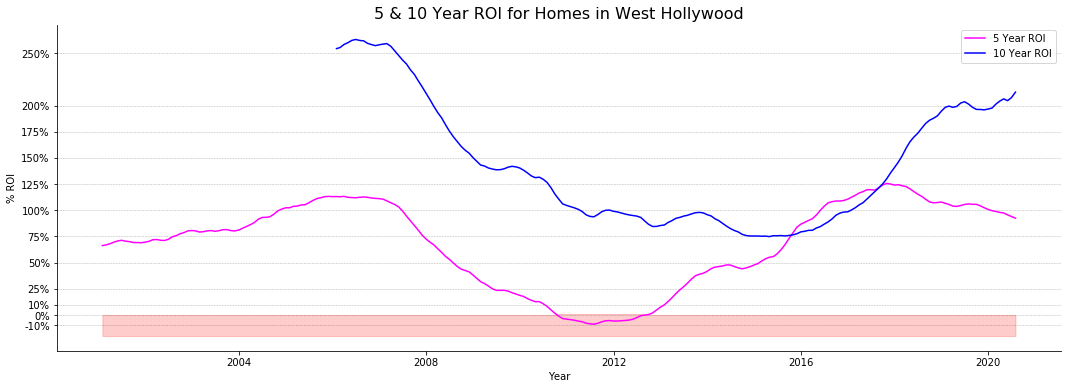

In [31]:
# create visualization of  time series:
plt.figure(figsize=(18,6))
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.plot(weho_roi_5yr, label='5 Year ROI', color='magenta')
ax.plot(weho_roi_10yr, label='10 Year ROI', color='blue')
ax.fill_between(weho_roi_5yr.index, weho_roi_5yr.value < 0, - 20, color='red', alpha=.2)
plt.title('5 & 10 Year ROI for Homes in West Hollywood', fontsize=16)
ax.set_ylabel('% ROI')
ax.set_xlabel('Year')
plt.yticks([-10,0,10,25,50,75,100,125,150,175,200, 250], [str(x) + "%" for x in [-10,0,10,25,50,75,100,125,150,175,200, 250]], fontsize=10)
ax.grid(which='major', axis='y', linestyle= "--", lw=0.5, color="black", alpha=0.3)
ax.legend()
plt.show();

# Step 6: Interpreting Results